**CHAPTER: Data Transformation Techniques**

# Data extraction

## Uploading datasets from github

In [ ]:
# importing csv file
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/vgames/games_about.csv
# Importing sqlite DB
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/vgames/games_db.sqlite
# Importing excel file
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/vgames/games_reviews.xlsx
# Importing json file
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/vgames/games_genres_valve.json

--2024-10-11 06:42:38--  https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/vgames/games_about.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174478 (170K) [text/plain]
Saving to: ‘games_about.csv’

games_about.csv     100%[===================>] 170.39K  --.-KB/s    in 0.02s   

2024-10-11 06:42:38 (7.14 MB/s) - ‘games_about.csv’ saved [174478/174478]

--2024-10-11 06:42:38--  https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/vgames/games_db.sqlite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

This is the logical data model:
![Image Description](https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/vgames/vgames_datamodel.png)

**For this data preparation work we would like to visualize the number of  reviews for the multi-players games per year**




After identifying all the involved datasources, we extract the raw data from each of those ones:

## Extracting data from traditional sources

Now we need to extract the data from the datasources:
1. Accessing to the data sources by using its own connector
2. Transforming (standardization, unduplication, etc.) when needed. It's a good practice to make the transformations at early stage especially if the same data is not shared/used in another data source.

### Extracting data from flat files

In [ ]:
import pandas as pd
df_csv = pd.read_csv("/content/games_about.csv")
df_csv.head()

,RecordID,name,short_description,long_description,link,Publisher,Year
0,1,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,https://store.steampowered.com/app/2358720/Bla...,Game Science,2024
1,2,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,https://store.steampowered.com/app/730/Counter...,Valve,2012
2,3,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,https://store.steampowered.com/app/2183900/War...,Focus Entertainment,2024
3,4,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,https://store.steampowered.com/app/1091500/Cyb...,CD PROJEKT RED,2020
4,5,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,https://store.steampowered.com/app/1245620/ELD...,FromSoftware,2022


### Reading the Valve (genre) games from a JSON file

In [ ]:
import pandas as pd
import json

# Load the JSON data from the file
with open('/content/games_genres_valve.json', 'r', encoding='utf-8-sig') as file:
    data = json.load(file)

# Convert the list of dictionaries into a DataFrame
df_json = pd.DataFrame(data)

# Display the DataFrame
df_json.head()

,name,Publisher,Year,Genre
0,Counter-Strike 2,Valve,2012,FPS
1,Counter-Strike 2,Valve,2012,Shooter
2,Counter-Strike 2,Valve,2012,Multi Player
3,Counter-Strike 2,Valve,2012,Competitive
4,Dota 2,Valve,2013,Free to Play


In [ ]:
df_json.shape

(28, 4)

In [ ]:
df_json["Genre"].value_counts()

,count
Genre,
Multi Player,5
FPS,4
Free to Play,2
Puzzle,1
Moddable,1
Sandbox,1
Classic,1
Sci-fi,1
Action,1


We can not here the genre value "**Multi Player**" is different than the genre specified in the csv file ("**Multiplayer**" in one word) ... this is an issue we must address.

### Extracting data from Excel spreadsheet

In [ ]:
import pandas as pd
df_excel = pd.read_excel('/content/games_reviews.xlsx')
df_excel.head()

,RecordID,overall_player_rating,totalreviews
0,123,Very Positive,168427
1,101,Very Positive,2688
2,256,1 user reviews,0
3,35,Very Positive,1338
4,17,Very Positive,1714757


In [ ]:
df_excel.shape

(290, 3)

In [ ]:
df_excel["overall_player_rating"].value_counts()

,count
overall_player_rating,
Very Positive,146
Overwhelmingly Positive,82
Mixed,26
Mostly Positive,25
Mostly Negative,4
Very Negative,2
1 user reviews,1
Positive,1
6 user reviews,1


Reviews needs to be standardized for a better analysis:

In [ ]:
# Define a function to categorize the rating
def categorize_rating(text):
    if 'Positive' in text:
        return 'Positive'
    elif 'Negative' in text:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the overall_player_rating column
df_excel['overall_player_rating'] = df_excel['overall_player_rating'].apply(categorize_rating)
df_excel

,RecordID,overall_player_rating,totalreviews
0,123,Positive,168427
1,101,Positive,2688
2,256,Neutral,0
3,35,Positive,1338
4,17,Positive,1714757
...,...,...,...
285,229,Positive,3531
286,65,Positive,275839
287,279,Positive,2172
288,191,Positive,109837


In [ ]:
df_csv.shape

(290, 7)

### Extracting data from a database (sqlite)

Gather games and their genre.  
*Note: Valve games do not appear here as they are stored in another file.*

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('/content/games_db.sqlite') #A
query = "select games.name, games.publisher, games.year, genres.genre "
query += "from games, genres "
query += "where games.genre = genres.ID" #B
df_sq = pd.read_sql_query(query, conn) #C
conn.close() #D
df_sq.head()

,name,Publisher,Year,Genre
0,Frostpunk 2,11 bit studios,2024,Resource Management
1,Oxygen Not Included,Klei Entertainment,2019,Resource Management
2,Frostpunk,11 bit studios,2018,Resource Management
3,NBA 2K25,2K,2024,Basketball
4,Season 1 MyCAREER Bonus Offer,2K,2024,Basketball


In [ ]:
df_sq.shape

(1132, 4)

In [ ]:
df_sq["Genre"].value_counts()

,count
Genre,
Simulation,78
Multiplayer,73
Sports,51
Strategy,51
Open World,50
...,...
Design & Illustration,1
Utilities,1
Hunting,1


### Scraping data from a website

*(Optional) but let's imagine we would need to collect the latest prices from the a website directly (as they authorize robots and scraping and they don't provide API), nothing's better than the web scraping technique:*

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the Steam game page
url = "https://store.steampowered.com/app/2358720/Black_Myth_Wukong/"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the price on the page (Steam usually uses the 'game_purchase_price' class)
    price_div = soup.find("div", class_="game_purchase_price")

    if price_div:
        price = price_div.text.strip()
        print(f"Latest Price: {price}")
    else:
        print("Price information not found on the page.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Latest Price: $59.99


## Data Sampling

### Random sampling

In [ ]:
import pandas as pd
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Class': ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B']
}
df = pd.DataFrame(data)
random_sample = df.sample(frac=0.5)
random_sample

,Feature1,Feature2,Class
3,4,40,B
4,5,50,A
9,10,100,B
5,6,60,B
2,3,30,B


#### Stratified sampling

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Class': ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B']
}

df = pd.DataFrame(data)

#A
stratum_A = df[df['Class'] == 'A']
stratum_B = df[df['Class'] == 'B']

#B
sample_A = resample(stratum_A, replace=False, n_samples=int(0.5 * len(stratum_A)))
sample_B = resample(stratum_B, replace=False, n_samples=int(0.5 * len(stratum_B)))

stratified_sample = pd.concat([sample_A, sample_B])
stratified_sample

,Feature1,Feature2,Class
1,2,20,A
8,9,90,A
9,10,100,B
5,6,60,B


#### Systematic sampling

In [ ]:
import pandas as pd
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Class': ['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B']
}
df = pd.DataFrame(data)
n = 3
systematic_sample = df.iloc[::n]
systematic_sample

,Feature1,Feature2,Class
0,1,10,A
3,4,40,B
6,7,70,B
9,10,100,B


# Data Wrangling

All the datasources with the needed data have been extracted, now we need to build out the final dataset, these are the steps to follow:

1.   Determine for each dataset their level of granularity. determine the master dataset (the one who usually have the right granularity and all te record needed).
2.   Standardize the data (especially on the columns that will be used for linkage and aggregation/filter)
3.   Align the granularity to the resquested one (aggregate/Filter)
4.   Join/Merge the datasets
5.   Apply some final transformations at the column level (formulas, etc.) if necessary
6. Unduplicates



### 1. Dataset Granularity list

The informations below should come from the Data Collection Plan (DCP) and can be adjusted all along the project duration:

|Data source|Data type|Dataset|Granularity|Description|Record Key|
|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|
|**games_about.csv**|**CSV file**|**games_about**|**1 game / row**	|**Basics games information (contains all games)**|**tuple(game name, publisher, year)**|
|games_db.sqlite|Database|genres|1 genre / row|Games genres list|tuple(game name, publisher, year)|
|games_db.sqlite|Database|games|tuple (game, genre) / row|Game with genres (without the Valve publisher)|Field Genre.ID|
|games_reviews.xlsx	|Excel file	|games_reviews	|1 game / row	|Games reviews |Column RecordID|
|games_genres_valve.json	|JSON file	|JSON structure	|1 tuple (game, genre) / node	|Games genre (restricted to the Valve publisher) |tuple(game name, publisher, year) per node|

The CSV file (games_about.csv) contains all the games and also provides the games basic informations, it's a great candidate for the master dataset. We'll start the data integration flow by this one.

### 2. Standardize the data

We don't have so much standarization stuff to do here, just converting the two values "Multiplayer" and "Multi Player" that came from different sources:

In [ ]:
df_json["Genre"] = df_json["Genre"].replace('Multi Player', 'Multiplayer')
df_json["Genre"].value_counts()

,count
Genre,
Multiplayer,5
FPS,4
Free to Play,2
Puzzle,1
Moddable,1
Sandbox,1
Classic,1
Sci-fi,1
Action,1


### 3. Granularity alignment

We need to align the datasources granularity to the master datasource:
* **games_about.csv**: Master dataset. We just need to filter it on the genres "Multiplayer", however this dataset does not contain the genre information, so we'll manage that filter later in the flow.
* **games_db.sqlite**: We only need to filtering out on genres "Multiplayer"
* **game_reviews.xlsx**: No need to align the granularity
* **games_genres_valve.json**: 2 actions:
 * We need to filter it on the genres "Multiplayer"
 * We need to union this dataset with its complementary from games_db.sqlite

In [ ]:
df_json_filtered = df_json[df_json['Genre'] == 'Multiplayer']
df_json_filtered

,name,Publisher,Year,Genre
2,Counter-Strike 2,Valve,2012,Multiplayer
6,Dota 2,Valve,2013,Multiplayer
10,Team Fortress 2,Valve,2007,Multiplayer
15,Left 4 Dead 2,Valve,2009,Multiplayer
26,Garry's Mod,Valve,2006,Multiplayer


In [ ]:
df_sq_filtered = df_sq[df_sq['Genre'] == 'Multiplayer']
df_sq_filtered

,name,Publisher,Year,Genre
635,PUBG: BATTLEGROUNDS,KRAFTON,2017,Multiplayer
636,Apex Legends™,Electronic Arts,2020,Multiplayer
637,Party Animals,Source Technology,2023,Multiplayer
638,Once Human,Starry Studio,2024,Multiplayer
639,NARAKA: BLADEPOINT,NetEase Games Global,2021,Multiplayer
...,...,...,...,...
703,Skater XL - The Ultimate Skateboarding Game,Easy Day Studios Pty Ltd,2020,Multiplayer
704,69 Balls,GKStudio,2023,Multiplayer
705,MX vs. ATV Reflex,THQ Nordic,2010,Multiplayer
706,RIDE 4,Milestone S.r.l.,2020,Multiplayer


### 4. Join/Merge the datasets

We need to concatenate (Union) the 2 datasets (from sqlite and json) as they both contains all the needed games from all publishers (Valve and no Valve).

In [ ]:
df_union = pd.concat([df_sq_filtered, df_json_filtered], ignore_index=True)
df_union = df_union.drop('Genre', axis=1)
df_union #.drop_duplicates()

,name,Publisher,Year
0,PUBG: BATTLEGROUNDS,KRAFTON,2017
1,Apex Legends™,Electronic Arts,2020
2,Party Animals,Source Technology,2023
3,Once Human,Starry Studio,2024
4,NARAKA: BLADEPOINT,NetEase Games Global,2021
...,...,...,...
73,Counter-Strike 2,Valve,2012
74,Dota 2,Valve,2013
75,Team Fortress 2,Valve,2007
76,Left 4 Dead 2,Valve,2009


We now need to join (inner join) the datasets together to have all the informations in one dataset:

In [ ]:
df_allreviews = pd.merge(df_csv, df_excel, how='inner', left_on='RecordID', right_on='RecordID')
df_allreviews.head()

,RecordID,name,short_description,long_description,link,Publisher,Year,overall_player_rating,totalreviews
0,1,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,https://store.steampowered.com/app/2358720/Bla...,Game Science,2024,Positive,654820
1,2,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,https://store.steampowered.com/app/730/Counter...,Valve,2012,Positive,8313603
2,3,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,https://store.steampowered.com/app/2183900/War...,Focus Entertainment,2024,Positive,62791
3,4,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,https://store.steampowered.com/app/1091500/Cyb...,CD PROJEKT RED,2020,Positive,680264
4,5,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,https://store.steampowered.com/app/1245620/ELD...,FromSoftware,2022,Positive,705261


In [ ]:
df_allreviews.shape

(290, 9)

The field Year is typed as integer 64, we need to convert it to make the join afterwards:

In [ ]:
df_allreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   RecordID               290 non-null    int64 
 1   name                   290 non-null    object
 2   short_description      277 non-null    object
 3   long_description       290 non-null    object
 4   link                   290 non-null    object
 5   Publisher              290 non-null    object
 6   Year                   290 non-null    int64 
 7   overall_player_rating  290 non-null    object
 8   totalreviews           290 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 20.5+ KB


In [ ]:
df_allreviews['Year'] = df_allreviews['Year'].astype(str)

Now we can filter the master dataset by using another dataset (filtered by the genre Multi Player):

In [ ]:
df_valve_mp = pd.merge(df_allreviews, df_union, how='inner', left_on=["name", "Publisher", "Year"], right_on=["name", "Publisher", "Year"])
df_valve_mp.head()

,RecordID,name,short_description,long_description,link,Publisher,Year,overall_player_rating,totalreviews
0,2,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,https://store.steampowered.com/app/730/Counter...,Valve,2012,Positive,8313603
1,6,PUBG: BATTLEGROUNDS,Play PUBG: BATTLEGROUNDS for free. Land on str...,"About This Game\nLAND, LOOT, SURVIVE!Play PUBG...",https://store.steampowered.com/app/578080/PUBG...,KRAFTON,2017,Neutral,2432683
2,7,Apex Legends™,"Apex Legends is the award-winning, free-to-pla...",About This Game\n\t\t\t\t\t\t\tConquer with ch...,https://store.steampowered.com/app/1172470/Ape...,Electronic Arts,2020,Neutral,948818
3,8,Dota 2,"Every day, millions of players worldwide enter...",About This Game\nThe most-played game on Steam...,https://store.steampowered.com/app/570/Dota_2?...,Valve,2013,Positive,2322723
4,9,Party Animals,"Fight your friends as puppies, kittens and oth...",About This Game\n Make Painfully Great Memorie...,https://store.steampowered.com/app/1260320/Par...,Source Technology,2023,Positive,38225


Aggregate by grouping by Year and publisher, sum the number of reviews:

In [ ]:
df_agg = df_valve_mp.groupby([ "Year"])["totalreviews"].sum().reset_index()
df_agg.head()

,Year,totalreviews
0,2006,945676
1,2007,1118530
2,2009,670096
3,2010,123682
4,2011,62836


In [ ]:
df_agg.shape

(17, 2)

### 5. Final transformations

N.A.

### 6. Unduplicates

In [ ]:
df_agg = df_agg.drop_duplicates()

In [ ]:
df_agg.head()

,Year,totalreviews
0,2006,945676
1,2007,1118530
2,2009,670096
3,2010,123682
4,2011,62836


# Final analysis (leveraging the data prep work)

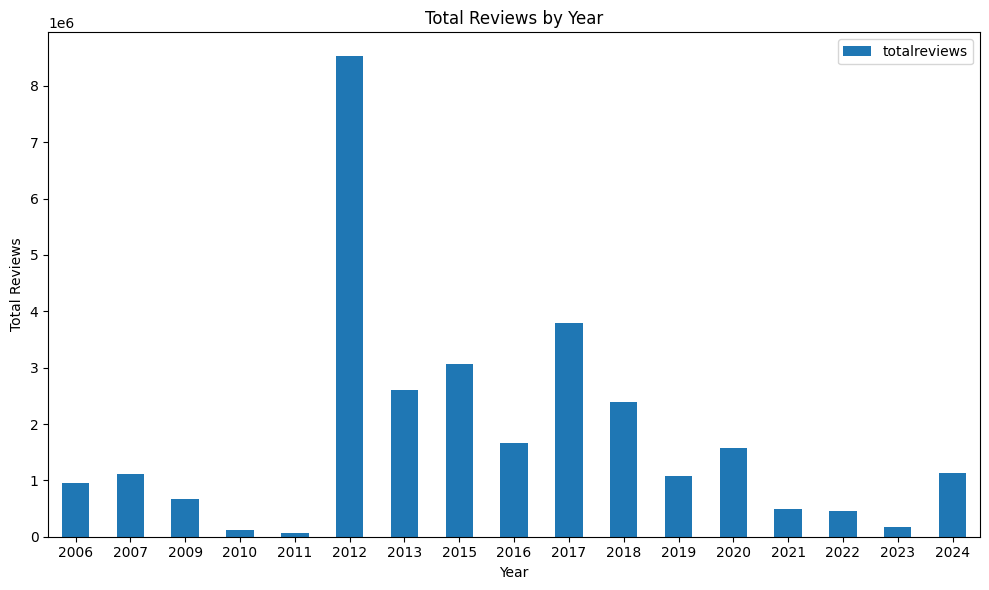

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot and plot as stacked bar plot
df_pivot = df_agg.pivot_table(index='Year', values='totalreviews', aggfunc='sum')
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Total Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Looking at the chart, a few key conclusions can be drawn:

### 1. **Peak in 2012**:
   - There is a massive spike in reviews in 2012, which could suggest that there was a significant event or release of highly anticipated games during that year. This is an outlier compared to other years.
   
### 2. **Fluctuations Over Time**:
   - The number of reviews fluctuates significantly from year to year. Some years, like 2015 and 2017, also show higher review numbers compared to others, though not as extreme as 2012.
   - There are also years with very few reviews, such as 2010, 2011, and 2023, indicating either fewer game releases or less popular games during those years.

### 3. **Decline in Recent Years**:
   - From 2018 onward, the total number of reviews seems to decline gradually, with very low numbers in 2021 and 2023.
   - 2024 shows a slight recovery but is still relatively low compared to earlier years.

### Possible Explanations:
   - **Industry Trends**: The spike in 2012 might indicate a peak period in the gaming industry, followed by periods of lower activity or less engagement from users.
   - **Consumer Behavior**: The fluctuating review numbers could be influenced by shifts in consumer preferences, such as the rise of mobile gaming or a shift towards digital platforms that aren't represented in the data.
   - **Major Releases**: Certain years could have seen the release of blockbuster games that generated a lot of reviews (like 2012), while other years may not have had such notable titles.
   - **Pandemic Influence**: The drop in 2021 and low levels in 2022 may reflect disruptions caused by the COVID-19 pandemic, affecting game development, releases, and consumer interaction.

### Further Exploration:
   - Investigate the major game releases or industry events that correspond to the years with high and low review counts.
   - Consider looking at the trends for specific genres or platforms to see if the fluctuations are concentrated in certain segments of the market.


In [ ]:
df_agg_rev = df_valve_mp.groupby(["overall_player_rating", "Year"])["totalreviews"].sum().reset_index()
df_agg_rev.head()

,overall_player_rating,Year,totalreviews
0,Negative,2022,37789
1,Negative,2023,10974
2,Neutral,2017,2432683
3,Neutral,2020,948818
4,Neutral,2021,66369


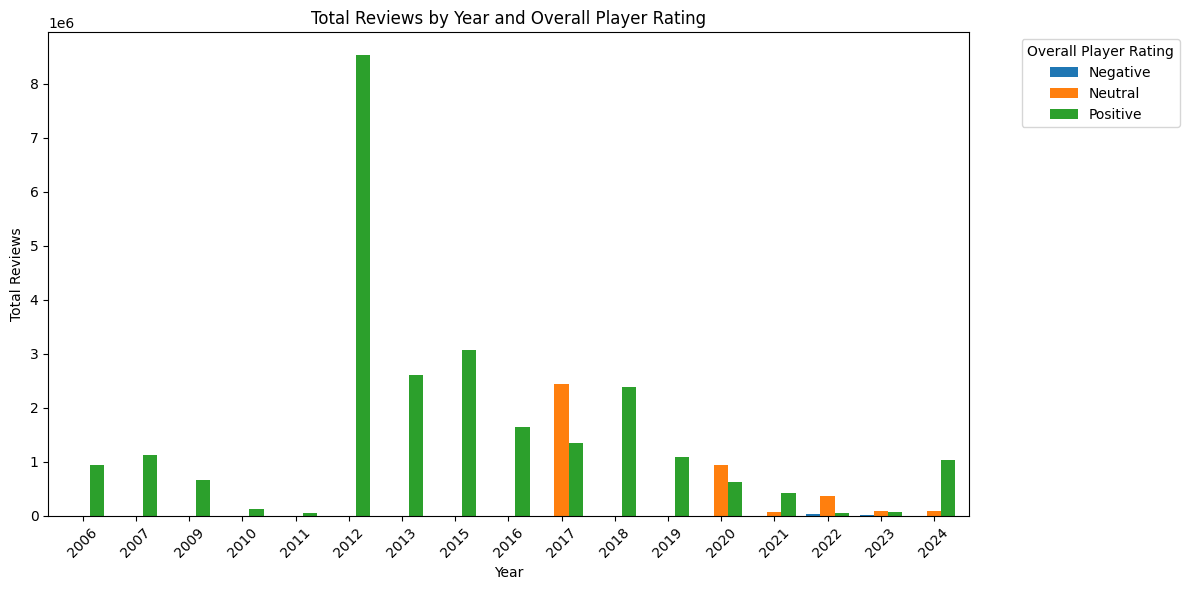

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Year and overall_player_rating, summing totalreviews
grouped_data = df_valve_mp.groupby(['Year', 'overall_player_rating'])['totalreviews'].sum().unstack()

# Create the grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the chart
plt.title('Total Reviews by Year and Overall Player Rating')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.legend(title='Overall Player Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()